In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


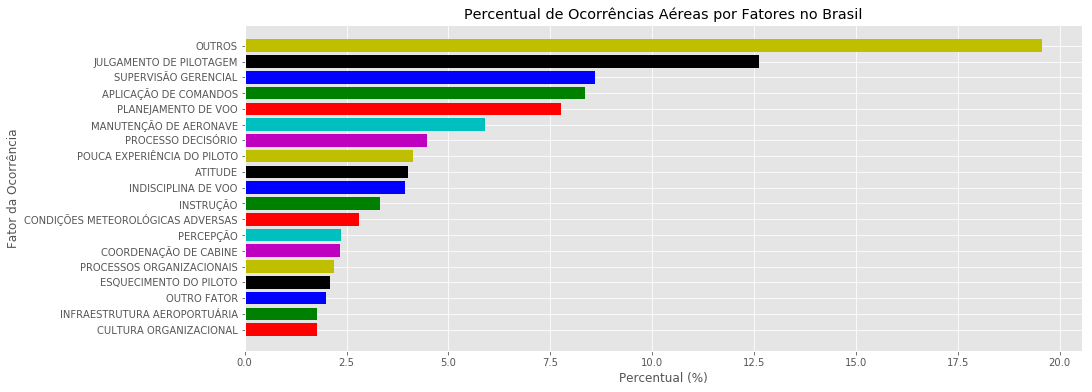

,Fator_Ocorrencia,Percentual
0,CULTURA ORGANIZACIONAL,1.770833
1,INFRAESTRUTURA AEROPORTUÁRIA,1.770833
2,OUTRO FATOR,2.000000
3,ESQUECIMENTO DO PILOTO,2.104167
4,PROCESSOS ORGANIZACIONAIS,2.187500
5,COORDENAÇÃO DE CABINE,2.333333
6,PERCEPÇÃO,2.375000
7,CONDIÇÕES METEOROLÓGICAS ADVERSAS,2.812500
8,INSTRUÇÃO,3.312500
9,INDISCIPLINA DE VOO,3.937500


In [0]:
#CRIAÇÃO GRÁFICO DE OCORRENCIAS AÉREAS POR FATORES NO BRASIL
#

#IMPORTANDO CSV (DIRETÓRIO BRUNO)
fatores=pd.read_csv('gdrive/My Drive/Material BSI/LP/Material Projeto/Ocorrencias/ftc.csv', sep='~')

#DEFINIR PERCENTUAIS DAS OCORRÊNCIAS POR FATORES
qtdes_ocorrencias_por_fator = fatores.iloc[:, 1].value_counts(normalize=True)
qtdes_ocorrencias_por_fator_percentual = qtdes_ocorrencias_por_fator * 100

#RECRIAR DATAFRAME
qtdes_ocorrencias_por_fator_percentual_df = pd.DataFrame({'Fator_Ocorrencia':qtdes_ocorrencias_por_fator_percentual.index, 'Percentual':qtdes_ocorrencias_por_fator_percentual.values})

#DETERMINAR O SOMATÓRIO DO PERCENTUAL DOS OUTROS
qtdes_ocorrencias_outros = qtdes_ocorrencias_por_fator_percentual_df.iloc[18:,1].sum(axis=0)

#CRIANDO DATAFRAME OUTROS
df_outros = pd.DataFrame({'Fator_Ocorrencia':['OUTROS'],'Percentual':[qtdes_ocorrencias_outros]})

#FATIANDO DATAFRAME FATORES
qtdes_ocorrencias_por_fator_percentual_fatiado = qtdes_ocorrencias_por_fator_percentual_df.iloc[:18,:].sort_values(by=['Percentual'])

#ADICIONANDO OUTROS NO DATAFRAME FATIADO E ORDENANDO
qtdes_ocorrencias_por_fator_percentual_fatiado_com_outros = qtdes_ocorrencias_por_fator_percentual_fatiado.append(df_outros, ignore_index=True)

#GRAFICO BARRA HORIZONTAL
x_pos = qtdes_ocorrencias_por_fator_percentual_fatiado_com_outros['Fator_Ocorrencia']
y_pos = qtdes_ocorrencias_por_fator_percentual_fatiado_com_outros['Percentual']
my_colors = 'rgbkymc'
plt.barh(x_pos, y_pos, color=my_colors)
plt.ylabel("Fator da Ocorrência")
plt.xlabel("Percentual (%)")
plt.title("Percentual de Ocorrências Aéreas por Fatores no Brasil")
plt.show()

qtdes_ocorrencias_por_fator_percentual_fatiado_com_outros

#GRAFICO BOX (FATORES)
# fatores['fator_nome'].value_counts().plot(kind='box')

#GRAFICO BOX (PERCENTUAL)
# qtdes_ocorrencias_por_fator_percentual_df.plot(kind='box')

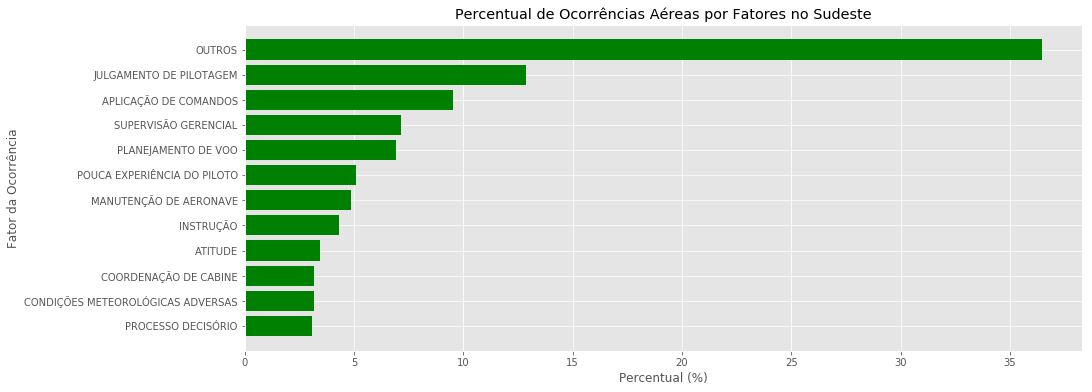

In [0]:
#CRIAÇÃO GRÁFICO DE OCORRENCIAS AÉREAS POR FATORES NO SUDESTE

#IMPORTANDO CSV
ocorrencias=pd.read_csv('gdrive/My Drive/Material BSI/LP/Material Projeto/Ocorrencias/oco.csv', sep='~')

#FILTRANDO APENAS OCORRENCIAS NO SUDESTE
ocorrencias_sudeste = ocorrencias.loc[ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

#FATIANDO DATAFRAME APENAS CODIGO E UF
ocorrencias_sudeste_fatiada = ocorrencias_sudeste.iloc[:,[0,8]].drop_duplicates()

#FATIANDO FATORES
fatores_fatiada= fatores.iloc[:, [0,1]]

#JUNTANDO FATORES COM OCORRENCIAS SUDESTE
fatores_sudeste = pd.merge(fatores_fatiada, ocorrencias_sudeste_fatiada, on = 'codigo_ocorrencia', how='inner')

#DEFINIR PERCENTUAIS DAS OCORRÊNCIAS POR FATORES
qtdes_ocorrencias_por_fator_sudeste = fatores_sudeste.iloc[:, 1].value_counts(normalize=True)
qtdes_ocorrencias_por_fator_percentual_sudeste = qtdes_ocorrencias_por_fator_sudeste * 100

#RECRIAR DATAFRAME
qtdes_ocorrencias_por_fator_percentual_sudeste_df = pd.DataFrame({'Fator_Ocorrencia':qtdes_ocorrencias_por_fator_percentual_sudeste.index, 'Percentual':qtdes_ocorrencias_por_fator_percentual_sudeste.values})

#DETERMINAR O SOMATÓRIO DO PERCENTUAL DOS OUTROS
qtdes_ocorrencias_sudeste_outros = qtdes_ocorrencias_por_fator_percentual_sudeste_df.iloc[11:,1].sum(axis=0)

#CRIANDO DATAFRAME OUTROS
df_sudeste_outros = pd.DataFrame({'Fator_Ocorrencia':['OUTROS'],'Percentual':[qtdes_ocorrencias_sudeste_outros]})

#FATIANDO DATAFRAME FATORES
qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado = qtdes_ocorrencias_por_fator_percentual_sudeste_df.iloc[:11,:]

#ADICIONANDO OUTROS NO DATAFRAME FATIADO E ORDENANDO
qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado.append(df_sudeste_outros, ignore_index=True).sort_values(by=['Percentual'])

#GRAFICO
x_pos = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros['Fator_Ocorrencia']
y_pos = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros['Percentual']
plt.barh(x_pos, y_pos, color='green')
plt.ylabel("Fator da Ocorrência")
plt.xlabel("Percentual (%)")
plt.title("Percentual de Ocorrências Aéreas por Fatores no Sudeste")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

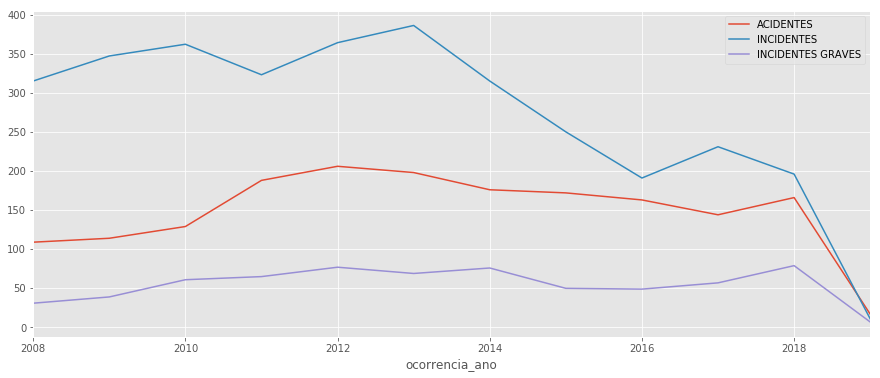

In [0]:
#CRIAÇÃO GRÁFICO LINEAR DE OCORRENCIAS NO TEMPO


#FILTRANDO APENAS OCORRENCIAS NO SUDESTE
ocorrencias_tipo_tempo = ocorrencias.iloc[:, [1,11]]

#EVOLUÇÃO ACIDENTES
ocorrencias_tipo_tempo_acidente = ocorrencias_tipo_tempo.loc[ocorrencias_tipo_tempo['ocorrencia_classificacao'] == 'ACIDENTE']

ocorrencias_tipo_tempo_acidente['ocorrencia_dia'] = pd.to_datetime(ocorrencias_tipo_tempo_acidente['ocorrencia_dia'])

ocorrencias_tipo_tempo_acidente['ocorrencia_ano'] = ocorrencias_tipo_tempo_acidente['ocorrencia_dia'].map(lambda x: x.strftime('%Y'))

ocorrencias_tipo_tempo_acidente_agrupado = ocorrencias_tipo_tempo_acidente.groupby('ocorrencia_ano').size()


#EVOLUÇÃO INCIDENTES
ocorrencias_tipo_tempo_incidente = ocorrencias_tipo_tempo.loc[ocorrencias_tipo_tempo['ocorrencia_classificacao'] == 'INCIDENTE']

ocorrencias_tipo_tempo_incidente['ocorrencia_dia'] = pd.to_datetime(ocorrencias_tipo_tempo_incidente['ocorrencia_dia'])

ocorrencias_tipo_tempo_incidente['ocorrencia_ano'] = ocorrencias_tipo_tempo_incidente['ocorrencia_dia'].map(lambda x: x.strftime('%Y'))

ocorrencias_tipo_tempo_incidente_agrupado = ocorrencias_tipo_tempo_incidente.groupby('ocorrencia_ano').size()


#EVOLUÇÃO INCIDENTE GRAVE
ocorrencias_tipo_tempo_incidente_grave = ocorrencias_tipo_tempo.loc[ocorrencias_tipo_tempo['ocorrencia_classificacao'] == 'INCIDENTE GRAVE']

ocorrencias_tipo_tempo_incidente_grave['ocorrencia_dia'] = pd.to_datetime(ocorrencias_tipo_tempo_incidente_grave['ocorrencia_dia'])

ocorrencias_tipo_tempo_incidente_grave['ocorrencia_ano'] = ocorrencias_tipo_tempo_incidente_grave['ocorrencia_dia'].map(lambda x: x.strftime('%Y'))

ocorrencias_tipo_tempo_incidente_grave_agrupado = ocorrencias_tipo_tempo_incidente_grave.groupby('ocorrencia_ano').size()





# ocorrencias_tipo_tempo_acidente_contagem = ocorrencias_tipo_tempo_acidente.groupby('ocorrencia_dia').size().cumsum()

ocorrencias_tipo_tempo_acidente_agrupado.plot(kind='line',legend = True, label = 'ACIDENTES')
ocorrencias_tipo_tempo_incidente_agrupado.plot(kind='line',legend = True, label = 'INCIDENTES')
ocorrencias_tipo_tempo_incidente_grave_agrupado.plot(kind='line',legend = True, label = 'INCIDENTES GRAVES')
plt.show()
# ocorrencias_tipo_tempo_acidente
# ocorrencias_tipo_tempo_acidente
# ocorrencias_tipo_tempo_acidente_contagem
# ocorrencias_tipo_tempo_acidente_agrupado

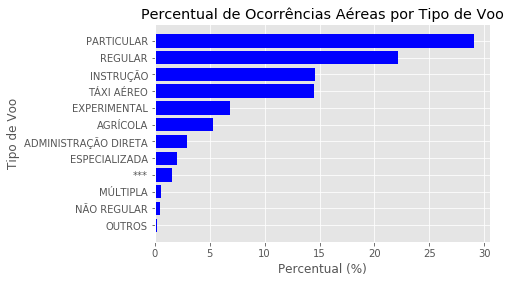

In [0]:
# Criado por ADAILSON \O/    \o/ 

#CRIAÇÃO GRÁFICO DE OCORRENCIAS AÉREAS POR FATORES NO SUDESTE

#IMPORTANDO CSV
ocorrencias=pd.read_csv('gdrive/My Drive/Material BSI/LP/Material Projeto/Ocorrencias/oco.csv', sep='~')
aeronaves=pd.read_csv('gdrive/My Drive/Material BSI/LP/Material Projeto/Ocorrencias/anv.csv', sep='~')

#FILTRANDO APENAS OCORRENCIAS NO SUDESTE
# ocorrencias_sudeste = ocorrencias.loc[ocorrencias['ocorrencia_uf'].isin(['ES','MG','RJ','SP'])]

#FATIANDO DATAFRAME
ocorrencias_fatiada = ocorrencias.iloc[:,[0,2]].drop_duplicates()

#FATIANDO AERONAVES
aeronaves_fatiada= aeronaves.iloc[:, [0,16]]

#JUNTANDO AERONAVES COM OCORRENCIAS
fatores_brasil = pd.merge(aeronaves_fatiada, ocorrencias_fatiada, on = 'codigo_ocorrencia', how='inner')

#DEFINIR PERCENTUAIS DAS OCORRÊNCIAS POR FATORES
qtdes_ocorrencias_por_fator_sudeste = fatores_brasil.iloc[:, 1].value_counts(normalize=True)
qtdes_ocorrencias_por_fator_percentual_sudeste = qtdes_ocorrencias_por_fator_sudeste * 100

#RECRIAR DATAFRAME
qtdes_ocorrencias_por_fator_percentual_sudeste_df = pd.DataFrame({'Fator_Ocorrencia':qtdes_ocorrencias_por_fator_percentual_sudeste.index, 'Percentual':qtdes_ocorrencias_por_fator_percentual_sudeste.values})

#DETERMINAR O SOMATÓRIO DO PERCENTUAL DOS OUTROS
qtdes_ocorrencias_sudeste_outros = qtdes_ocorrencias_por_fator_percentual_sudeste_df.iloc[11:,1].sum(axis=0)

#CRIANDO DATAFRAME OUTROS
df_sudeste_outros = pd.DataFrame({'Fator_Ocorrencia':['OUTROS'],'Percentual':[qtdes_ocorrencias_sudeste_outros]})

#FATIANDO DATAFRAME FATORES
qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado = qtdes_ocorrencias_por_fator_percentual_sudeste_df.iloc[:11,:]

#ADICIONANDO OUTROS NO DATAFRAME FATIADO E ORDENANDO
qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado.append(df_sudeste_outros, ignore_index=True).sort_values(by=['Percentual'])

#GRAFICO
x_pos = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros['Fator_Ocorrencia']
y_pos = qtdes_ocorrencias_por_fator_percentual_sudeste_fatiado_com_outros['Percentual']
plt.barh(x_pos, y_pos, color='blue')
plt.ylabel("Tipo de Voo")
plt.xlabel("Percentual (%)")
plt.title("Percentual de Ocorrências Aéreas por Tipo de Voo")
plt.show()


In [0]:
list_t = [512, 571, 624, 673, 488, 461, 502, 410, 308, 199, 51]
list_i = [16, 16, 18, 20, 20, 13, 13, 9, 4, 5, 1]
res = []
for x in range(len(list_t)):
    r = list_i[x]/list_t[x]
    res.append(r)

print(res)
media = sum(res)/len(res) * 100
print(media)

[0.03125, 0.028021015761821366, 0.028846153846153848, 0.029717682020802376, 0.040983606557377046, 0.028199566160520606, 0.025896414342629483, 0.02195121951219512, 0.012987012987012988, 0.02512562814070352, 0.0196078431372549]
2.659874022422466


In [0]:
percentuais = list(map(lambda x,y: x/y, list_i,list_t))
print(percentuais)
media = sum(percentuais)/len(percentuais) * 100
print(media)

[0.03125, 0.028021015761821366, 0.028846153846153848, 0.029717682020802376, 0.040983606557377046, 0.028199566160520606, 0.025896414342629483, 0.02195121951219512, 0.012987012987012988, 0.02512562814070352, 0.0196078431372549]
2.659874022422466
